## Aqualfil Data

In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv('/Users/shemontod/Desktop/Instrumar/aquafil_short/scaled_labeled_data.csv')
df.head(2)

,TimeStamp_start,ThreadlineId,count,meanmagnitude,meannodequality,meannodespermetre,stdmagnitude,stdnodequality,stdnodespermetre,varmagnitude,...,q95nodespermetre,q100nodespermetre,kurtmagnitude,kurtnodequality,kurtnodespermetre,skewmagnitude,skewnodequality,skewnodespermetre,TimeStamp_end,Label
0,2023-06-12 00:27:00,143000004,150,0.558376,0.278365,0.605805,0.023180,0.047854,0.167353,0.023287,...,0.084196,0.107891,0.067124,0.044632,0.025480,0.489314,0.560958,0.794205,2023-06-12 00:27:30,0
1,2023-06-12 00:27:30,143000004,150,0.558613,0.280978,0.597428,0.029333,0.057320,0.151320,0.029871,...,0.081434,0.114977,0.082360,0.057983,0.021216,0.464716,0.577828,0.824255,2023-06-12 00:28:00,0


In [66]:
a = df.copy()
a.drop(columns=["TimeStamp_start","TimeStamp_end","ThreadlineId","count"], inplace=True)
X = a.drop("Label",1)   #Feature Matrix
y = a["Label"] 
X.shape

/var/folders/gd/ht5zgzwx4kq5sb9xg3g1d9_xxp38qx/T/ipykernel_62343/2850360030.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = a.drop("Label",1)   #Feature Matrix


(15997, 48)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Get unique labels and count the frequency of each label
unique_labels = y_train.unique()
label_counts = y_train.value_counts()

# Create a bar plot with labels for each bar
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Create the bars and labels
bars = ax.bar(unique_labels, label_counts, color='blue')
for bar, label in zip(bars, label_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

plt.title(' Frequencies of classes in Training set for PHP data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

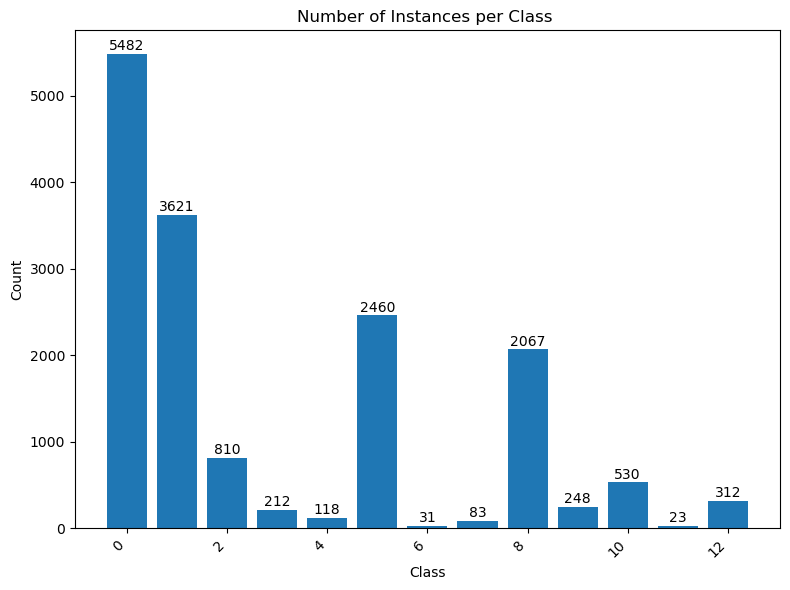

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and labels
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a DataFrame to easily count instances per class in the training set
data_train = pd.DataFrame({'Class': y})

# Count the number of instances in each class
class_counts_train = data_train['Class'].value_counts().reset_index()
class_counts_train.columns = ['Class', 'Count']

# Sort the DataFrame by class (optional)
class_counts_train = class_counts_train.sort_values(by='Class')

# Create a bar plot for the training set
plt.figure(figsize=(8, 6))
bars_train = plt.bar(class_counts_train['Class'], class_counts_train['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances per Class ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add count labels on top of each bar
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## PCA

In [14]:
pca = PCA()
pca_transform = pca.fit_transform(X_train)
pca_transform.shape

(12797, 48)

In [15]:
transform_data = pd.DataFrame(pca_transform)
transform_data['Class'] = y_train
transform_data.shape

(12797, 49)

In [18]:
explained_variance_ratios = pca.explained_variance_ratio_

# Print each percentage with its corresponding component number
for idx, percentage in enumerate(np.round(explained_variance_ratios * 100, decimals=5)):
    print(f"Component {idx }: {percentage}%")

Component 0: 34.58921%
Component 1: 15.27758%
Component 2: 14.20275%
Component 3: 9.51401%
Component 4: 7.95693%
Component 5: 3.03429%
Component 6: 2.61748%
Component 7: 2.22861%
Component 8: 1.54246%
Component 9: 1.36199%
Component 10: 1.05994%
Component 11: 0.92566%
Component 12: 0.75896%
Component 13: 0.65385%
Component 14: 0.50446%
Component 15: 0.45252%
Component 16: 0.38397%
Component 17: 0.34443%
Component 18: 0.33987%
Component 19: 0.28521%
Component 20: 0.25368%
Component 21: 0.20717%
Component 22: 0.19183%
Component 23: 0.16459%
Component 24: 0.15335%
Component 25: 0.12302%
Component 26: 0.10463%
Component 27: 0.08749%
Component 28: 0.08473%
Component 29: 0.07303%
Component 30: 0.07177%
Component 31: 0.0593%
Component 32: 0.05373%
Component 33: 0.0482%
Component 34: 0.04223%
Component 35: 0.03792%
Component 36: 0.03442%
Component 37: 0.02956%
Component 38: 0.02664%
Component 39: 0.02439%
Component 40: 0.02035%
Component 41: 0.01666%
Component 42: 0.01403%
Component 43: 0.0116

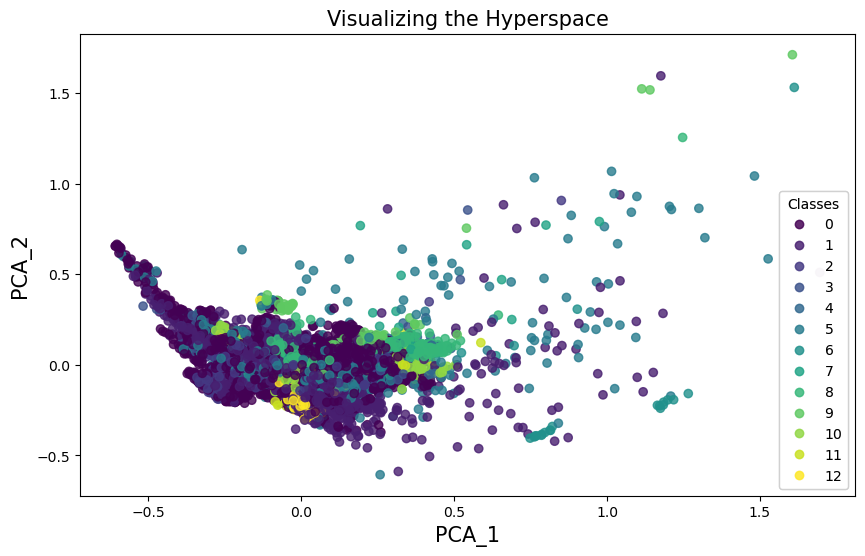

In [19]:

# Assuming you have PCA-transformed data in transform_data and class labels in class_labels

# Create a colormap with a unique color for each class
class_labels = y_train
unique_classes = pd.unique(class_labels)
colormap = plt.cm.get_cmap('viridis', len(unique_classes))

# Create a scatter plot using class_labels for color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    transform_data.iloc[:, 0],
    transform_data.iloc[:, 1],
    c=class_labels,  # Use class_labels for coloring
    cmap=colormap,
    alpha=0.8
)

plt.xlabel("PCA_1", fontsize=15)
plt.ylabel("PCA_2", fontsize=15)

# Create a legend for the unique classes
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
plt.gca().add_artist(legend1)

plt.title('Visualizing the Hyperspace', fontsize=15)
plt.show()


## Confusion matrix

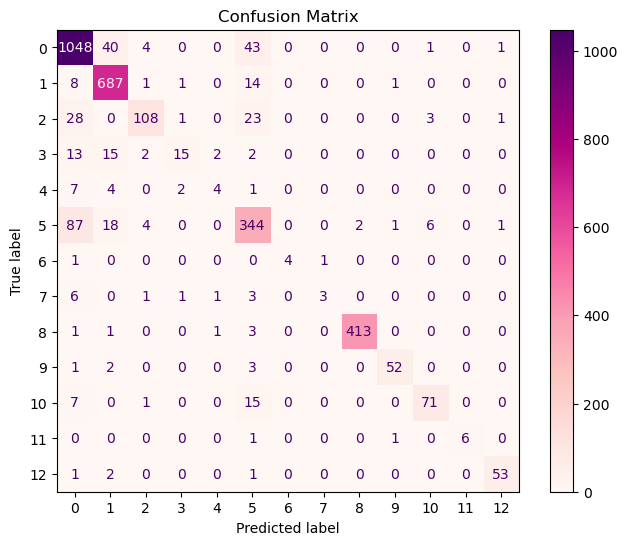

In [21]:
# This is the one without percentages. That is it shows the number of instances correctly classified.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Train a classifier (e.g., XGBoost)
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Define the class labels for your 4 classes (replace with your own class labels)
#class_labels = ["Crossover", "Entanglement", "GodetWrap", "MajorCrossover"]

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

# Plot the confusion matrix with class labels as legend
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap='RdPu', values_format='d', ax=ax)

plt.title('Confusion Matrix')

plt.show()


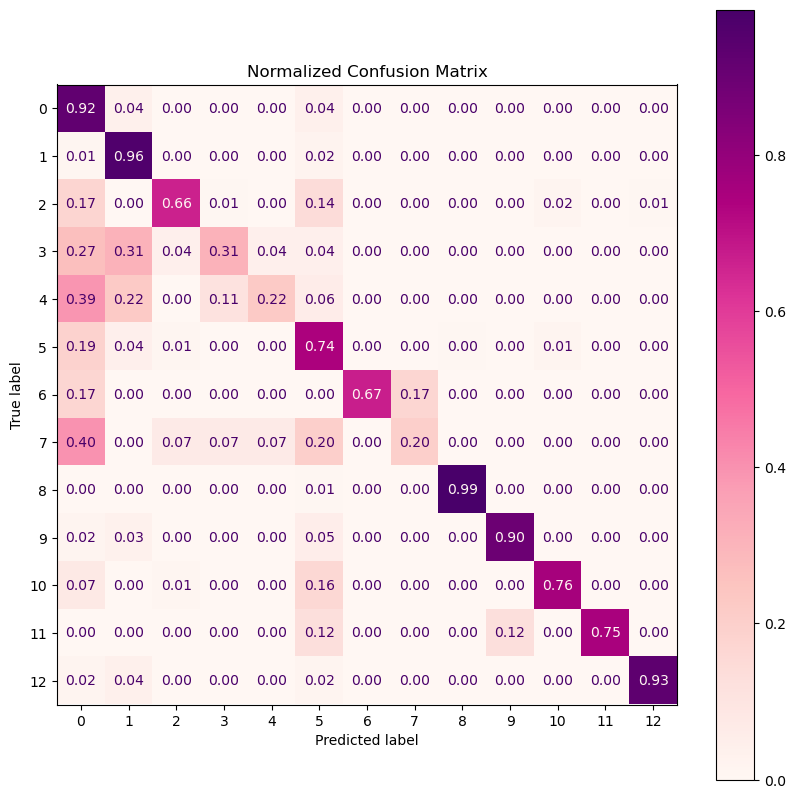

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Train a classifier (e.g., XGBoost)
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Calculate class-wise sums to normalize the confusion matrix
class_sums = np.sum(confusion_matrix, axis=1)[:, np.newaxis]

# Create a normalized confusion matrix
normalized_confusion_matrix = confusion_matrix / class_sums


# Plot the normalized confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=normalized_confusion_matrix)

# Plot the normalized confusion matrix with class labels as legend
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(cmap='RdPu', values_format='.2f', ax=ax)

plt.title('Normalized Confusion Matrix')
plt.show()

## wound loop-3 (212), slack knot-4(118), variable fiber-7(83)

## Predict_proba

In [30]:
probs = classifier.predict_proba(X_test)

In [31]:
probs

array([[1.2149727e-05, 3.8914159e-06, 5.6522705e-08, ..., 6.6902018e-08,
        4.0596859e-08, 2.1690275e-07],
       [9.9734396e-01, 9.6184755e-05, 1.6615496e-03, ..., 1.5230122e-05,
        5.2239388e-06, 4.2764987e-06],
       [1.6365279e-02, 9.8347294e-01, 2.2670603e-05, ..., 2.4036079e-05,
        1.6020873e-05, 4.9202581e-06],
       ...,
       [1.3996020e-03, 6.9486094e-03, 9.4218331e-04, ..., 4.1189665e-04,
        6.5291487e-04, 9.0834394e-05],
       [2.4141192e-01, 2.5927149e-02, 2.1932185e-01, ..., 3.7016165e-03,
        2.1113856e-05, 8.0761565e-05],
       [3.1365725e-01, 1.2728710e-02, 4.1092136e-03, ..., 6.3828832e-01,
        1.4895626e-05, 2.8689790e-05]], dtype=float32)

In [34]:
probs.shape

(3200, 13)

In [48]:
probs = classifier.predict_proba(X_test)
a = probs[100]
np.set_printoptions(suppress=True)
print(a)
total_prob = np.sum(a)
total_prob

[0.979446   0.00007229 0.00191107 0.0000118  0.00008303 0.01810259
 0.00000719 0.00001018 0.00000908 0.00000512 0.00032505 0.00000626
 0.00001037]


0.99999994

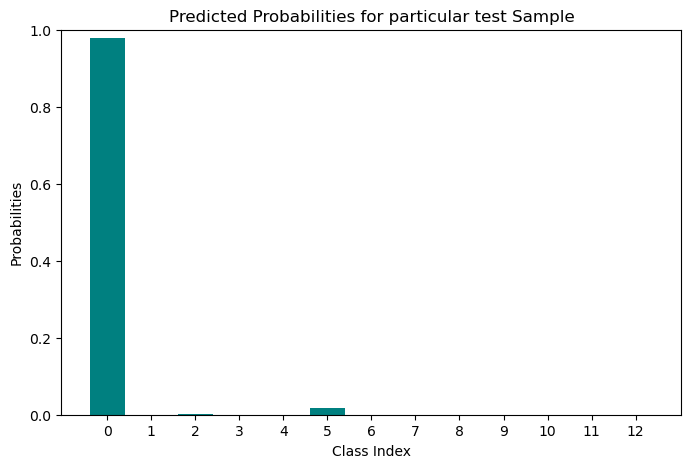

In [53]:
num_classes = len(a)

# Create indices representing the classes
class_indices = np.arange(num_classes)

# Create a bar plot to visualize probabilities for the first sample
plt.figure(figsize=(8, 5))
pAlt.bar(class_indices, a, color='teal')  # Plotting the probabilities for each class
plt.xlabel('Class Index')
plt.ylabel('Probabilities')
plt.title('Predicted Probabilities for particular test Sample')
plt.ylim(0, 1)  # Set y-axis limit for probability range (0 to 1)

# Set x-axis ticks as class indices
plt.xticks(class_indices)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Calculate class-wise sums to normalize the confusion matrix
class_sums = np.sum(confusion_matrix, axis=1)[:, np.newaxis]

# Create a normalized confusion matrix
normalized_confusion_matrix = confusion_matrix / class_sums


cm_display = ConfusionMatrixDisplay(confusion_matrix=normalized_confusion_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(cmap='RdPu', values_format='.2f', ax=ax)

plt.title('Normalized Confusion Matrix')
plt.show()

## Feature selection using PCA

In [16]:
pca2 = PCA(n_components= 4)
pca_transform2 = pca2.fit_transform(X_train)
pca_transform2.shape

(12797, 4)

In [17]:
dataset_pca = pd.DataFrame(abs(pca2.components_), columns=X_train.columns)
#print('\n\n', dataset_pca)
dataset_pca

,meanmagnitude,meannodequality,meannodespermetre,stdmagnitude,stdnodequality,stdnodespermetre,varmagnitude,varnodequality,varnodespermetre,stabmagnitude,...,q75nodespermetre,q90nodespermetre,q95nodespermetre,q100nodespermetre,kurtmagnitude,kurtnodequality,kurtnodespermetre,skewmagnitude,skewnodequality,skewnodespermetre
0,0.346761,0.377250,0.580179,0.004586,0.050609,0.136941,0.032093,0.011705,0.045496,0.177557,...,0.078161,0.097135,0.114147,0.156286,0.004564,0.006192,0.000411,0.001800,0.000730,0.019494
1,0.491336,0.271236,0.365243,0.114742,0.135468,0.093942,0.069390,0.033504,0.092300,0.336227,...,0.058981,0.058361,0.061977,0.068898,0.009481,0.002272,0.009644,0.018650,0.045105,0.030423
2,0.349653,0.131402,0.445376,0.131128,0.231443,0.166599,0.109297,0.056233,0.131343,0.139937,...,0.049433,0.036619,0.028034,0.000045,0.013798,0.017220,0.016833,0.002182,0.009050,0.085434
3,0.706308,0.285751,0.229374,0.056010,0.031701,0.097518,0.034299,0.015473,0.035894,0.327484,...,0.029982,0.024395,0.023204,0.025426,0.002697,0.009546,0.003710,0.023172,0.041128,0.029075


In [19]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print('\n\nAs per PC 3:\n', (dataset_pca[dataset_pca > 0.3].iloc[2]).dropna())
print('\n\nAs per PC 4:\n', (dataset_pca[dataset_pca > 0.3].iloc[3]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 meanmagnitude        0.346761
meannodequality      0.377250
meannodespermetre    0.580179
q0nodespermetre      0.326410
Name: 0, dtype: float64


As per PC 2:
 meanmagnitude        0.491336
meannodespermetre    0.365243
stabmagnitude        0.336227
stabnodequality      0.386541
Name: 1, dtype: float64


As per PC 3:
 meanmagnitude        0.349653
meannodespermetre    0.445376
Name: 2, dtype: float64


As per PC 4:
 meanmagnitude      0.706308
stabmagnitude      0.327484
stabnodequality    0.443607
Name: 3, dtype: float64

******************************************************************


# Number of Cluster tuning using the Silhouette score method

Parameter: {'n_clusters': 3} Score 0.23716429776943215
Parameter: {'n_clusters': 4} Score 0.26741630603600963
Parameter: {'n_clusters': 5} Score 0.20022597120351623
Parameter: {'n_clusters': 6} Score 0.18793262914997946
Parameter: {'n_clusters': 7} Score 0.20766022140472773
Parameter: {'n_clusters': 8} Score 0.21241856839091616
Parameter: {'n_clusters': 9} Score 0.21882470684169875
Parameter: {'n_clusters': 10} Score 0.2249085542438553
Parameter: {'n_clusters': 11} Score 0.2247322409531103
Parameter: {'n_clusters': 12} Score 0.210906827776919


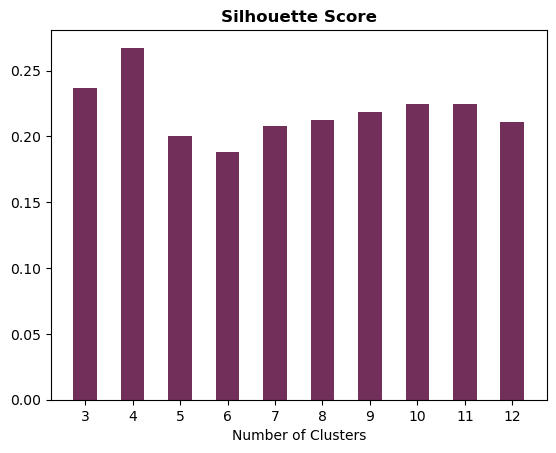

In [23]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

# candidate values for our number of cluster
parameters = [3,4, 5, 6, 7, 8, 9, 10, 11, 12]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(X)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(X, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

# Probability Threshold for Prediction

In [55]:
probs = classifier.predict_proba(X_test)
a = probs[100]
np.set_printoptions(suppress=True)
print(a)
total_prob = np.sum(a)
total_prob

[0.979446   0.00007229 0.00191107 0.0000118  0.00008303 0.01810259
 0.00000719 0.00001018 0.00000908 0.00000512 0.00032505 0.00000626
 0.00001037]


0.99999994

In [61]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier 

# Generating sample data
'''
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=4,  # Increase n_informative to 4
    n_redundant=0,
    n_clusters_per_class=1,  # Reduce n_clusters_per_class to 1
    n_classes=5,
    random_state=42
)
'''

# Splitting the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Obtaining probabilities for test set
probs = classifier.predict_proba(X_test)

# Setting a custom threshold for probabilities
threshold = 0.8  # Define your custom threshold here

# Classifying instances based on the custom threshold
predicted_classes = np.where(np.max(probs, axis=1) >= threshold, np.argmax(probs, axis=1), -1)

# Printing the predicted classes and identifying "unknown" instances
for i, pred_class in enumerate(predicted_classes):
    if pred_class != -1:
        print(f"Instance {i}: Predicted Class {pred_class} (Probability: {np.max(probs[i])})")
    else:
        print(f"Instance {i}: Unknown (All Probabilities < Threshold)")


Instance 0: Predicted Class 3 (Probability: 0.9995217323303223)
Instance 1: Predicted Class 2 (Probability: 0.9984303116798401)
Instance 2: Predicted Class 1 (Probability: 0.988254189491272)
Instance 3: Predicted Class 1 (Probability: 0.9754212498664856)
Instance 4: Predicted Class 3 (Probability: 0.9972782731056213)
Instance 5: Predicted Class 4 (Probability: 0.9685103297233582)
Instance 6: Predicted Class 0 (Probability: 0.9992688298225403)
Instance 7: Predicted Class 1 (Probability: 0.9555968046188354)
Instance 8: Predicted Class 3 (Probability: 0.9787776470184326)
Instance 9: Predicted Class 4 (Probability: 0.9564863443374634)
Instance 10: Predicted Class 1 (Probability: 0.9954487681388855)
Instance 11: Predicted Class 0 (Probability: 0.9992445707321167)
Instance 12: Predicted Class 4 (Probability: 0.9941781759262085)
Instance 13: Predicted Class 1 (Probability: 0.9914728403091431)
Instance 14: Predicted Class 2 (Probability: 0.9986853003501892)
Instance 15: Predicted Class 3 (Prob

In [70]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier 

# Generating sample data
'''
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=4,  # Increase n_informative to 4
    n_redundant=0,
    n_clusters_per_class=1,  # Reduce n_clusters_per_class to 1
    n_classes=5,
    random_state=42
)
'''

# Splitting the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Obtaining probabilities for test set
probs = classifier.predict_proba(X_test)

# Setting a custom threshold for probabilities
threshold = 0.8  # Define your custom threshold here

# Classifying instances based on the custom threshold
#predicted_classes = np.where(np.max(probs, axis=1) >= threshold, np.argmax(probs, axis=1), -1)

# Printing the predicted classes and identifying "unknown" instances
for i, pred_class in enumerate(predicted_classes):
    if pred_class != -1:
        print(f"Instance {i}: Predicted Class {pred_class} (Probability: {np.max(probs[i])})")
    else:
        print(f"Instance {i}: Unknown (All Probabilities < Threshold)")


Instance 0: Predicted Class 8 (Probability: 0.9999027252197266)
Instance 1: Predicted Class 0 (Probability: 0.9973439574241638)
Instance 2: Predicted Class 1 (Probability: 0.9834729433059692)
Instance 3: Unknown (All Probabilities < Threshold)
Instance 4: Predicted Class 8 (Probability: 0.9999206066131592)
Instance 5: Predicted Class 0 (Probability: 0.9843316078186035)
Instance 6: Predicted Class 1 (Probability: 0.9977065324783325)
Instance 7: Unknown (All Probabilities < Threshold)
Instance 8: Unknown (All Probabilities < Threshold)
Instance 9: Predicted Class 0 (Probability: 0.9927337169647217)
Instance 10: Predicted Class 8 (Probability: 0.9999254941940308)
Instance 11: Predicted Class 5 (Probability: 0.9976227879524231)
Instance 12: Predicted Class 8 (Probability: 0.9998849630355835)
Instance 13: Predicted Class 0 (Probability: 0.8076973557472229)
Instance 14: Unknown (All Probabilities < Threshold)
Instance 15: Predicted Class 1 (Probability: 0.8185089826583862)
Instance 16: Predi

In [71]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Obtaining probabilities for test set
probs = classifier.predict_proba(X_test)

# Printing the predicted class and associated probability for each instance
for i, prob in enumerate(probs):
    predicted_class = np.argmax(prob)  # Predicted class (index with highest probability)
    max_prob = np.max(prob)  # Maximum probability for the predicted class
    print(f"Instance {i}: Predicted Class {predicted_class} (Probability: {max_prob})")

Instance 0: Predicted Class 8 (Probability: 0.9999027252197266)
Instance 1: Predicted Class 0 (Probability: 0.9973439574241638)
Instance 2: Predicted Class 1 (Probability: 0.9834729433059692)
Instance 3: Predicted Class 0 (Probability: 0.5556373596191406)
Instance 4: Predicted Class 8 (Probability: 0.9999206066131592)
Instance 5: Predicted Class 0 (Probability: 0.9843316078186035)
Instance 6: Predicted Class 1 (Probability: 0.9977065324783325)
Instance 7: Predicted Class 0 (Probability: 0.6443434357643127)
Instance 8: Predicted Class 5 (Probability: 0.5747926831245422)
Instance 9: Predicted Class 0 (Probability: 0.9927337169647217)
Instance 10: Predicted Class 8 (Probability: 0.9999254941940308)
Instance 11: Predicted Class 5 (Probability: 0.9976227879524231)
Instance 12: Predicted Class 8 (Probability: 0.9998849630355835)
Instance 13: Predicted Class 0 (Probability: 0.8076973557472229)
Instance 14: Predicted Class 1 (Probability: 0.7649091482162476)
Instance 15: Predicted Class 1 (Pro